In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
import scipy as sc
import scipy.integrate
from scipy.integrate import simpson
from scipy.integrate import dblquad, solve_ivp
from scipy.interpolate import interp1d

In [2]:
# Available data for S-LMOPs for anodic scan
V_sa = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
a1_sa = [-0.193, -0.0641, -0.00884, -0.00135, -0.00233, -0.00638,
-0.00984, -0.0075, -0.00255, 0.00511, 0.294]
a2_sa = [-0.409, -0.055, -0.0216, -0.00592, 0.0122, 0.0526,
0.213, 0.569, 1.14, 1.75, 0.461]
# Available data for S-LMOPs for cathodic scan
V_sc = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
a1_sc = [-0.193, -0.139, -0.121, -0.056, -0.0163, -0.0241, -
0.0373, 0.0265, 0.0748, 0.121, 0.294]
a2_sc = [-0.409, -0.432, -0.386, -0.669, -0.749, -0.583, -0.519,
-0.421, -0.348, -0.155, 0.461]
# Available data for B-LMOPs for anodic scan
V_ba = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2,
1.4]
a1_ba = [-0.0197, -0.00307, -0.000654, -0.0000707, -0.0000663, -
0.000131, -0.00105, 0.00229, 0.0026, -0.0074, 0.00158, 0.00144]
a2_ba = [-0.106, -0.0362, -0.00174, 0.000157, 0.0000338,
0.000332, 0.0116, 0.0283, 0.0649, 0.182, 0.225, 0.297]
# Available data for B-LMOPs for cathodic scan
V_bc = [-0.8, -0.6, -0.4, 0, 0.4, 0.8, 1.0, 1.2, 1.4]
a1_bc = [-0.0197, -0.00174, 0.00204, 0.00486, 0.00352, 0.000425,
-0.000795, 0.000963, 0.00144]
a2_bc = [-0.106, -0.15, -0.111, -0.0796, -0.0524, 0.0337, 0.08,
0.151, 0.297]
#Scan rate
V = [2,5,10,20,50]

# problem 1

The Very Tired Graduate Student is studying new materials for batteries and would like to
determine the effect of particle size on Mg2+ ion intercalation into λ-MnO2 cathode materials.
The Very Tired Graduate Student utilizes cyclic voltammetry (CV) measurements under 5
different scan rates 𝜈 (2 mV/s, 5 mV/s, 10 mV/s, 20 mV/s, and 50 mV/s) for two kinds of
particles: small-LiMnO2 particles (S-LMOPs) and big-LiMnO2 particles (B-LMOPs) to compare
their performance.
Based on the literature, the current 𝑖 (in A/g) measured in CV curves includes contributions
from a diffusion-limited Faradaic process and a capacitive response. For this study on the effect
of particle size, the relation between the current 𝑖 and the scan rate 𝜈 at a fixed voltage
𝑉 (in V) is expressed by a linear combination of two power laws:

𝑖(𝑉) = 𝑎1𝜈 + 𝑎2𝜈^(0.5)

where 𝑎1 and 𝑎2 are voltage-dependent parameters, and 𝑎1𝜈 and 𝑎2𝜈
0.5
are the currents from
the capacitive response and diffusion-limited Faradaic process, respectively

#### (a) Part of The Very Tired Graduate Student’s experimental (𝑉 at 10 mV/s) and processed data (𝑎1 and 𝑎2) for S-LMOPs is listed below. Plot the contributions to the current from the Faradaic intercalation (red curve) and capacitive response (blue curve) in comparison to the total current (black curve) in the same figure. Indicate the anodic scan as data points connected with solid lines and the cathodic scan as data points connected with dashed lines.

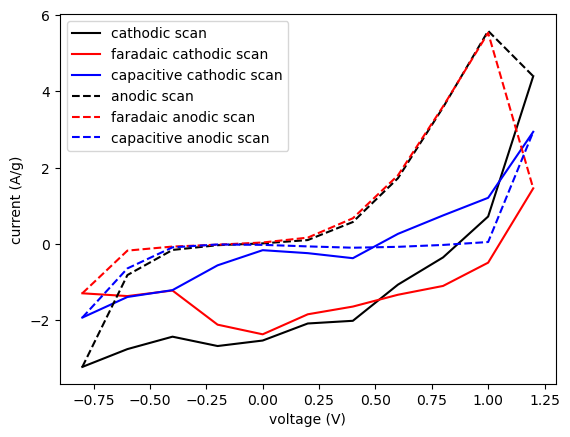

In [3]:
Vexp = 10

cath_far=[]
cath_cap=[]
cath=[]
an_far=[]
an_cap=[]
an=[]
for i in range(int(11)):
    cath_far.append(a2_sc[i]*Vexp**.5)
    cath_cap.append(a1_sc[i]*Vexp)
    an_far.append(a2_sa[i]*Vexp**.5)
    an_cap.append(a1_sa[i]*Vexp)
for i in range(11):
    cath.append(cath_cap[i]+cath_far[i])
    an.append(an_cap[i]+an_far[i])

plt.plot(V_sc, cath,'k-', label = 'cathodic scan')
plt.plot(V_sc, cath_far,'r-', label = 'faradaic cathodic scan')
plt.plot(V_sc, cath_cap,'b-', label = 'capacitive cathodic scan')
plt.plot(V_sa, an,'k--', label = 'anodic scan')
plt.plot(V_sa, an_far,'r--', label = 'faradaic anodic scan')
plt.plot(V_sa, an_cap,'b--', label = 'capacitive anodic scan')
plt.xlabel('voltage (V)')
plt.ylabel('current (A/g)')
plt.legend()
plt.show()

#### (b) Usually the area within the CV loop (i.e., between the anodic and cathodic curves) represents the capacity of a battery material to store charge (i.e., capacity = current x voltage). Calculate using Simpson's rules the percentage contribution to the total charge storage capacity attributed to Faradaic intercalation.

In [4]:
simpC = simpson(an_cap,V_sa) - simpson(cath_cap,V_sc)
simpF = simpson(an_far,V_sa) - simpson(cath_far,V_sc)
simpS = simpC + simpF
print(f'{(simpF/simpS*100)}%')

98.23370934305056%


#### (c) Given the data below at 𝜈 =10 mV/s and again using Simpson’s rules, what is the total charge storage capacity for the B-LMOPs? How does it compare to the S-LMOPs? How does your conclusion based on your analysis compare to that of the authors?

In [5]:
cath_far=[]
cath_cap=[]
cath=[]
an_far=[]
an_cap=[]
an=[]

for i in range(9):
    cath_far.append(a2_bc[i]*Vexp**.5)
    cath_cap.append(a1_bc[i]*Vexp)
    cath.append(cath_cap[i]+cath_far[i])
for i in range(12):
    an_far.append(a2_ba[i]*Vexp**.5)
    an_cap.append(a1_ba[i]*Vexp)
    an.append(an_cap[i]+an_far[i])

simpC = simpson(an_cap,V_ba) - simpson(cath_cap,V_bc)
simpF = simpson(an_far,V_ba) - simpson(cath_far,V_bc)
simpB = simpC + simpF
print(f'S-LMOPs = {simpS}')
print(f'B-LMOPs = {simpB}')
print(f'{simpS/simpB}* B-LMOPs = S-LMOPs, which is close to the authors value of 10')

S-LMOPs = 5.359631286855486
B-LMOPs = 0.45126012212048033
11.877032833458609* B-LMOPs = S-LMOPs, which is close to the authors value of 10


# problem 2
There is no closed form solution for the error function:
erf(𝑎) = 2/√𝜋 ∫𝑒^(-x^2) 𝑑x

#### (a) Use the two-point Gauss quadrature approach to estimate erf(1.5). Note that the exact value is 0.966105.

In [6]:
def f(x):
    return np.exp(-(x**2))
def quad(f,a,b):
    half = (b-a)/2
    x = -1/(3**0.5)
    mid = (b+a)/2
    res = half*(f((x*half)+mid)+f(-(x*half)+mid))
    return res
approx = 2*quad(f,0,1.5) / (np.pi**(0.5))
print(approx)

0.9741731236063721


#### (b) Apply an existing function in python that applies Gauss quadrature to integrate the error function to 𝑎 = 1.5. 

In [7]:
q = sc.integrate.quad(f,0,1.5)[0]
print((q*2) / (np.sqrt(np.pi)))

0.9661051464753108


# problem 3
Consider a disc of space dust and rocks of radius 𝑅 = 100 m and total mass 𝑀 = 10,000 kg.
Assume that the disc can be approximated as infinitesimally thin. Next consider a 1 kg point
mass placed directly above the center of the disc in a coordinate frame with origin located on
the center of the disc and 𝑧-axis perpendicular to the plane of the disc. The force experienced
by the point mass under the gravitational attraction of the disc resolved in the 𝑧-direction is
given by:
𝑓𝑧
(𝑧)  where 𝐺 = 6.67408 × 10−11 m3kg−1
s
−2
is the gravitational constant and 𝜎 is the mass per
unit area of the disc.

#### (a) Integrate the above expression over the range 𝑧 = [50, 1000] m using scipy.integrate.dblquad.

In [8]:
G = 6.67408*10**-11
z = np.linspace(50, 1000)
def f(x,y,z):
    return 1/((x**2+y**2+z**2)**(3/2))
def fz(f,z):
    bot = lambda x,r=100:-(10000-x**2)**0.5
    top = lambda x,r=100:(10000-x**2)**0.5
    #use dblquad for the integral
    return G/np.pi*z*sc.integrate.dblquad(f,-100,100,bot,top, args=(z,))[0]

integrals=[]
for i in z:
    integrals.append(fz(f,i))

#### (b) Make a plot of 𝑓𝑧(𝑧) in pN over the same range of 𝑧.

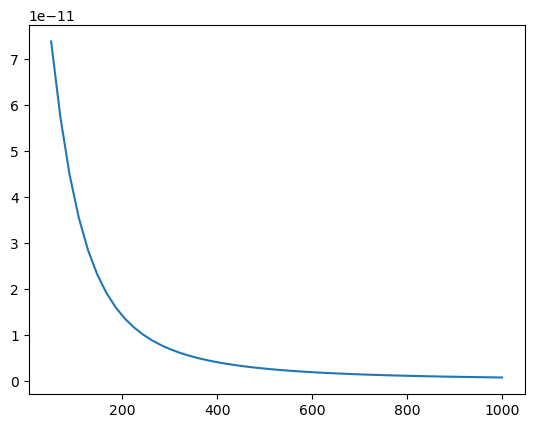

In [9]:
plt.plot(z,integrals)
plt.show()

At large 𝑧, the integral can be approximated as ~𝑓𝑧(𝑧) =𝐺𝜎𝜋𝑅^2 / z^2

#### (c) Make a plot of ~𝑓𝑧(𝑧) and 𝑓𝑧(𝑧) in the same plot. Explain any discrepancy that you observe.

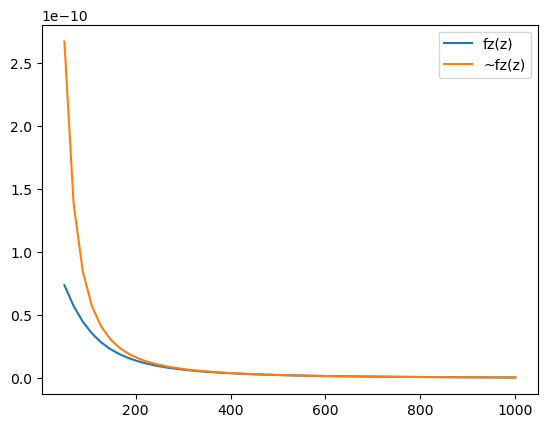

In [10]:
plt.plot(z,integrals,label='fz(z)')
def fapprox(z):
    return (G*(10000/(np.pi*10000))*np.pi*10000)/(z**2)
approx=[]
for i in z:
    approx.append(fapprox(i))
plt.plot(z,approx,label='~fz(z)')
plt.legend()
plt.show()

the approximation is quite accurate with larger zs but is very unnacurate for small distances (z)

# problem 4

#### (a) Write your own code to implement Euler’s method: euler(fn, xi, xf, y0, h) where fn is a differential function 𝒅𝒚/𝒅𝒙 to be solved, xi is the initial x value, xf is the final x value, h is the step size, and y0 is the initial value. Your euler function should return a list of all the computed y values from xi to xf inclusive.

In [11]:
def f(x,y):
    return np.sin(x) - y

def euler(f, xi, xf, y0, h):
    y = y0
    x = xi
    res=[y]
    xs=[x]
    while x < xf:
        y += f(x,y)*h
        res.append(y)
        x += h
        xs.append(x)
    return res,xs

#### (b) Write your own code to implement Heun's method: heun(df, xi, xf, y0, h) where fn is a differential function 𝒅𝒚/𝒅𝒙 to be solved, xi is the initial x value, xf is the final x value, h is the step size, and y0 is the initial value. Your heun function should return a list of all the computed y values from xi to xf inclusive.

In [12]:
def heun(f, xi, xf, y0, h):
    x = xi
    y = y0
    res = [y]
    xs=[x]
    while x <= xf:
        ki = f(x, y)
        ke = f(x+h, y+ki*h)
        y += (ki+ke)*h/2
        x += h 
        res.append(y)
        xs.append(x)
    return res,xs

#### (c) Given the function 𝒚′ = 𝐬𝐢𝐧(𝒙) − 𝒚 and initial condition of 𝒚(𝒙 = 𝟎) = 𝟏. 𝟕, solve with the Euler’s and the Heun’s methods for the domain 𝒙 = [𝟎, 𝟐𝝅] using step sizes that correspond to [𝟐 , 𝟐𝟎, 𝟐𝟎𝟎, … , 𝟐 × 𝟏𝟎𝟔] number of steps. Also solve using the RK23, RK45, and LSODA methods via the python library function scipy.integrate.solve_ivp. Remember that these library methods are adaptive methods, and automatically select the step size to be taken. The analytical solution to this differential equation is 𝒚 = 𝟐. 𝟐𝒆^−𝒙 + 𝒔𝒊𝒏(𝒙)/𝟐 − 𝒄𝒐𝒔(𝒙)/𝟐. Plot this analytical solution for 𝒚 versus 𝒙, the 𝝅/𝟏𝟎 step size solutions from your Euler’s and Heun’s methods, and the solve_ivp solutions, on a single plot. Be sure to label axes, provide a title, make each data set its own color, and provide a legend.

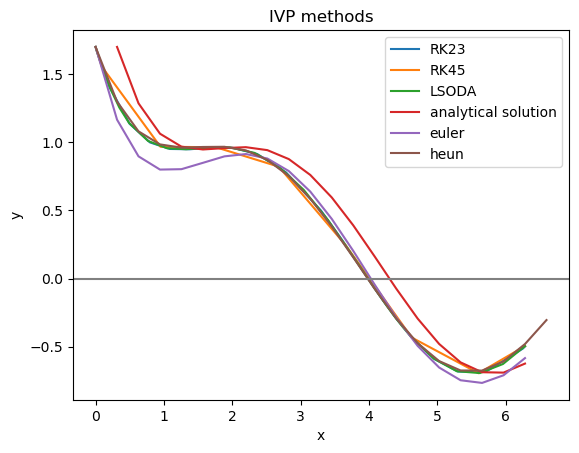

In [61]:
def yprime(x,y):
    return np.sin(x) - y
def y(x):
    return 2.2*np.exp(-x)+np.sin(x)/2-np.cos(x)/2
rk23=solve_ivp(yprime,[0,2*np.pi],[1.7],method='RK23')
rk45=solve_ivp(yprime,[0,2*np.pi],[1.7],method='RK45')
lsoda=solve_ivp(yprime,[0,2*np.pi],[1.7],method='LSODA')

def an_sol(f,a,b,y,h):
    an_list=[]
    xs=[]
    while a < b:
        an = f(a)
        an_list.append(an)
        a += h
        xs.append(a)
    return an_list, xs
an,anx= an_sol(y, 0, 2*np.pi, 1.7, np.pi/10)
ey,ex= euler(f, 0, 2*np.pi, 1.7, np.pi/10)
hy,hx= heun(f, 0, 2*np.pi, 1.7, np.pi/10)

plt.plot(rk23.t, rk23.y[0], label='RK23')
plt.plot(rk45.t, rk45.y[0], label='RK45')
plt.plot(lsoda.t, lsoda.y[0], label='LSODA')
plt.plot(anx, an, label='analytical solution')
plt.plot(ex, ey, label='euler')
plt.plot(hx, hy, label='heun')

plt.axhline(y=0,c='grey')
plt.title('IVP methods')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### (d) How does the error associated with each method scale with the step size taken? To understand the effect of step size in these methods, plot in a single figure the absolute value of the fractional relative true error at 𝒙 = 𝟐𝝅 as a function of step size for all 5 numerical methods. Plot using the average step size for the adaptive methods. Note that you may find it beneficial to plot your results on a semilog or log-log scale. Explain the differences observed in the global errors between the methods.

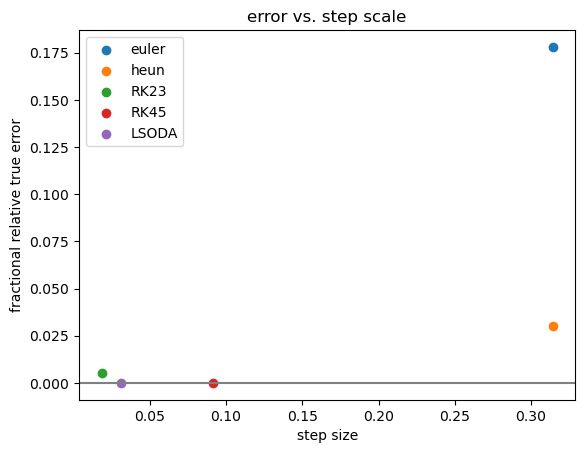

In [79]:
yrk23=rk23.y[0][-1]
yrk45=rk45.y[0][-1]
ylsoda=lsoda.y[0][-1]

step_rk23=rk23.t[1]-rk23.t[0]
step_rk45=rk45.t[1]-rk45.t[0]
step_lsoda=lsoda.t[1]-lsoda.t[0]

tval = -0.495891626
def frte(approx,tval):
    return abs((approx-tval)/tval)

hsol=heun(f, 0, 2*np.pi, 1.7, np.pi/10)
ys=hsol[0]
xs=hsol[1]
hy2pi=ys[xs.index(2*np.pi)]

esol = euler(f, 0, 2*np.pi, 1.7, np.pi/10)
ys=esol[0]
xs=esol[1]
ey2pi=ys[xs.index(2*np.pi)]

plt.scatter(np.pi/10, frte(ey2pi,tval), label='euler')
plt.scatter(np.pi/10, frte(hy2pi,tval),label='heun')
plt.scatter(step_rk23, frte(yrk23,tval),label='RK23')
plt.scatter(step_rk45, frte(yrk45,tval),label='RK45')
plt.scatter(step_lsoda, frte(ylsoda, tval),label='LSODA')

plt.axhline(y=0,c='grey')
plt.xlabel('step size')
plt.ylabel('fractional relative true error')
plt.legend()
plt.title('error vs. step scale')
plt.show()

# problem 5

A spherical tank has a circular orifice in its bottom through which the liquid flows out. The flow
rate through the hole can be estimated as
𝑄𝑜𝑢𝑡 = 𝐶𝐴√2𝑔𝐻
where 𝑄𝑜𝑢𝑡 = outflow (m3
/s), 𝐶 = an empirically-derived
coefficient, 𝐴 = the area of the orifice (m2
), 𝑔 = the
gravitational constant (= 9.81 m/s2
), and 𝐻 = the depth of
liquid in the tank. Implement and use the fourth-order
Runge-Kutta numerical method to determine how long it will
take for the water to flow out of a 3 m diameter tank with an
initial height of 2.75 m. Note that the orifice has a diameter
of 3 cm and 𝐶 = 0.55.

In [163]:
g=9.81
def q(a,h):
    return (0.55*a*(2 * 9.81*h)**0.5) / (2*np.pi*1.5*h-np.pi*h**2)
def rk4(x, y, h):
    k1 = q(x, y)
    k2 = q(x + .5*h, y + .5*k1*h)
    k3 = q(x + .5*h, y + .5*k2*h)
    k4 = q(x + h, y + k3*h)
    return y + (k1+2*k2+2*k3+k4)/6
itr=0
x=0.015*np.pi**2
y=2.75
while y > .01 and itr < 99999:
    y = rk4(x, y, .01)
    itr+=1

print(y, itr)
#65 seconds to drain

-0.476658862167501 65


# problem 6

The following equations developed by the American meteorologist Edward Lorenz are a simple
model for atmospheric fluid dynamics:
𝑑𝑥
𝑑𝑡 = −𝜎𝑥 + 𝜎𝑦
𝑑𝑦
𝑑𝑡 = 𝑟𝑥 − 𝑦 − 𝑥𝑧
𝑑𝑧
𝑑𝑡 = −𝑏𝑧 + 𝑥𝑦
Lorenz developed these equations to relate the intensity of atmospheric fluid motion, 𝑥, to
temperature variations 𝑦 and 𝑧 in the horizontal and vertical directions, respectively. These
equations are nonlinear as provided from the simple multiplicative terms (𝑥𝑧 and 𝑥𝑦).

#### Use numerical methods to obtain solutions for these equations, with 𝜎 = 10, 𝑏 = 2.666667, 𝑟 = 28, and initial conditions of (𝑥, 𝑦, 𝑧) = (5, 5, 5), then

In [164]:
def fn(t, y, sigma=10, b=2.666667, r=28):
    x, y, z = y
    dydt = [-sigma*x + sigma*y, r*x - y - x*z, -b*z + x*y]
    return dydt
rk45_1 = solve_ivp(fn, [0, 20], [5, 5, 5], method='RK45')

#### (i) Plot the results to visualize how the dependent variables change temporally for 𝑡 from 0 to 20 (i.e., provide plots of 𝑥, 𝑦, and 𝑧 versus 𝑡). 

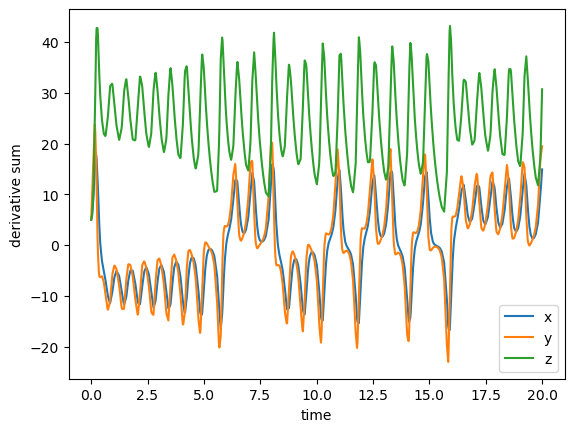

In [172]:
newt = np.linspace(0, 20, 1000)

xinter_1=interp1d(rk45_1.t, rk45_1.y[0])
yinter_1=interp1d(rk45_1.t, rk45_1.y[1])
zinter_1 = interp1d(rk45_1.t, rk45_1.y[2])

plt.plot(newt, xinter_1(newt), label='x')
plt.plot(newt, yinter_1(newt), label='y')
plt.plot(newt, zinter_1(newt), label='z')
plt.legend()
plt.xlabel('time')
plt.ylabel('derivative sum')
plt.legend()
plt.show()

#### (ii) What differences do you observe if the initial conditions are slightly perturbed to (𝑥, 𝑦, 𝑧) = (5.001, 5, 5)?

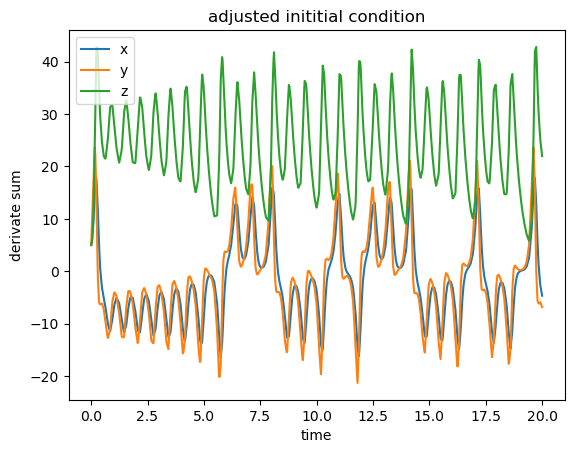

In [171]:
rk45_2 = solve_ivp(fn, [0, 20], [5.001, 5, 5], method='RK45')

xinter_2 = interp1d(rk45_2.t, rk45_2.y[0])
yinter_2= interp1d(rk45_2.t, rk45_2.y[1])
zinter_2= interp1d(rk45_2.t, rk45_2.y[2])

plt.plot(newt, xinter_2(newt), label='x')
plt.plot(newt, yinter_2(newt), label='y')
plt.plot(newt, zinter_2(newt), label='z')
plt.xlabel('time')
plt.ylabel('derivate sum')
plt.legend()
plt.title('adjusted inititial condition')
plt.show()

#### (iii) In addition, plot the dependent variables versus each other to see whether any interesting patterns emerge (i.e., plot in 3D with axes of 𝑥, 𝑦, and 𝑧).

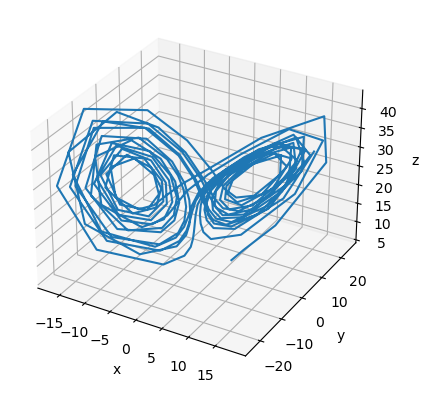

In [180]:
soln = solve_ivp(fn, [0, 20], [5, 5, 5], method='RK45')
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(soln.y[0], soln.y[1], soln.y[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()